# Regression Model for Bike Sharing Using Python - Take 3
### David Lowe
### June 12, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: Bike Sharing Dataset

Dataset ML Model: Regression with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

For performance benchmarks, please consult: https://www.kaggle.com/contactprad/bike-share-daily-data

INTRODUCTION: Using the data generated by a bike sharing system, this project attempts to predict the daily demand for bike sharing. For this iteration of the project, we attempt to use the data available for discovering a suitable machine learning algorithm that future predictions can use. We have kept the data transformation activities to a minimum and drop the several attributes that do not make sense to keep or simply will not help in training the model.

For the Take No.3 of the project, we will leverage the hourly data, instead of the daily data from Take No.1. We will examine the algorithm performance and see how the hourly dataset performs against the daily data for modeling algorithms.

CONCLUSION: The baseline performance of predicting the target variable achieved an average RMSE value of 118 (vs. RMSE of 1483 from the daily dataset. Three algorithms (k-Nearest Neighbors, Random Forest, and Extra Trees) achieved the lowest RMSE values during the initial modeling round. After a series of tuning trials with these three algorithms, Extra Trees produced the best RMSE value of 69 (vs. 1233 using the daily data).

Extra Trees also processed the validation dataset with an RMSE value of 68 (vs. 1293 using the daily data), which was better than the average training result. For this project, the Extra Trees ensemble algorithm yielded top-notch training and validation results, which warrant the additional processing required by the algorithm.

Furthermore, the use of hourly data generally yielded significantly better RMSE values for all algorithms vs. daily data. It is therefore a recommended approach to leverage the predictive models by using the hourly data whenever possible.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [167]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [168]:
startTimeScript = datetime.now()

inputFile = 'bike-sharing-hour.csv'
entireDataset = read_csv(inputFile)
entireDataset = entireDataset.rename(columns={'cnt': 'targetVar'})

# We are making some preliminary assumptions to drop certain attributes right from the beginning.
# Assumption #1: Drop the "instant" column since it is just an unique row identifier.
# Assumption #2: Drop the "detday" column since it is just an unique date field.
# Assumption #3: Drop the "yr" column since it was just an date representation and a one-time occurance.
# Assumption #4: Drop the "casual" and "registered" columns since they are just derived number from the target variable and directly correlate with it.
entireDataset.drop('instant', axis=1, inplace=True)
entireDataset.drop('dteday', axis=1, inplace=True)
entireDataset.drop('yr', axis=1, inplace=True)
entireDataset.drop('casual', axis=1, inplace=True)
entireDataset.drop('registered', axis=1, inplace=True)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [169]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [170]:
print(entireDataset.head(20))

    season  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
0        1     1   0        0        6           0           1  0.24  0.2879   
1        1     1   1        0        6           0           1  0.22  0.2727   
2        1     1   2        0        6           0           1  0.22  0.2727   
3        1     1   3        0        6           0           1  0.24  0.2879   
4        1     1   4        0        6           0           1  0.24  0.2879   
5        1     1   5        0        6           0           2  0.24  0.2576   
6        1     1   6        0        6           0           1  0.22  0.2727   
7        1     1   7        0        6           0           1  0.20  0.2576   
8        1     1   8        0        6           0           1  0.24  0.2879   
9        1     1   9        0        6           0           1  0.32  0.3485   
10       1     1  10        0        6           0           1  0.38  0.3939   
11       1     1  11        0        6  

#### 2.a.ii) Dimensions of the dataset.

In [171]:
print(entireDataset.shape)

(17379, 12)


#### 2.a.iii) Types of the attributes.

In [172]:
print(entireDataset.dtypes)

season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
targetVar       int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [173]:
print(entireDataset.describe())

             season          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      6.537775     11.546752      0.028770      3.003683   
std        1.106918      3.438776      6.914405      0.167165      2.005771   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      4.000000      6.000000      0.000000      1.000000   
50%        3.000000      7.000000     12.000000      0.000000      3.000000   
75%        3.000000     10.000000     18.000000      0.000000      5.000000   
max        4.000000     12.000000     23.000000      1.000000      6.000000   

         workingday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      0.496987      0.475775      0.627229   
std        0.465431      0.639357      0.192556    

#### 2.a.v) Summarize the levels of the class attribute.

In [174]:
# Not applicable for this iteration of the project.
# print(entireDataset.groupby('targetVar').size())

#### 2.a.v) Count missing values.

In [175]:
print(entireDataset.isnull().sum())

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
targetVar     0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [176]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [177]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

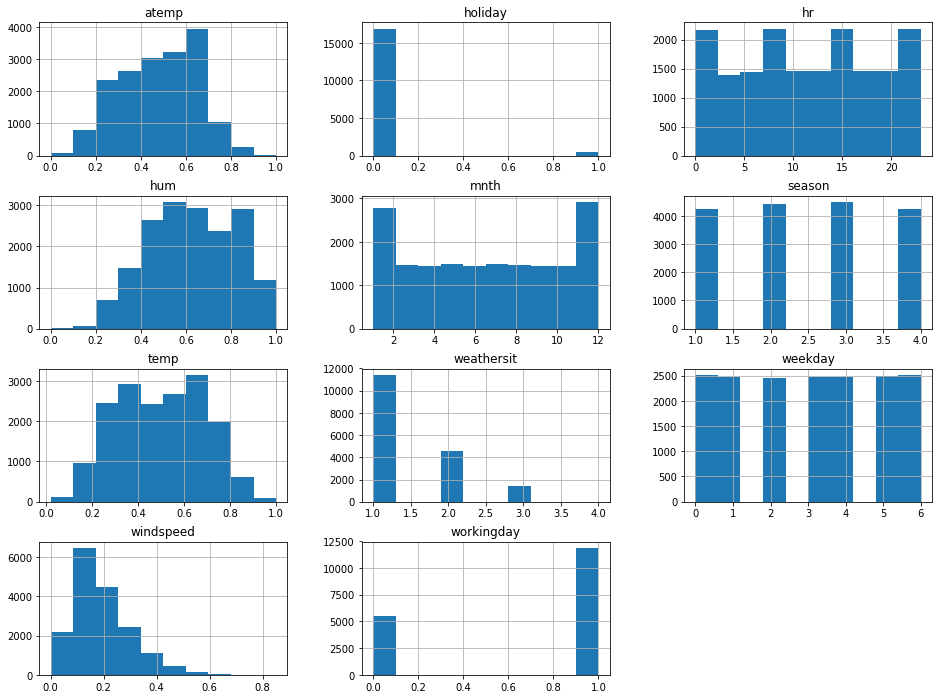

In [178]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

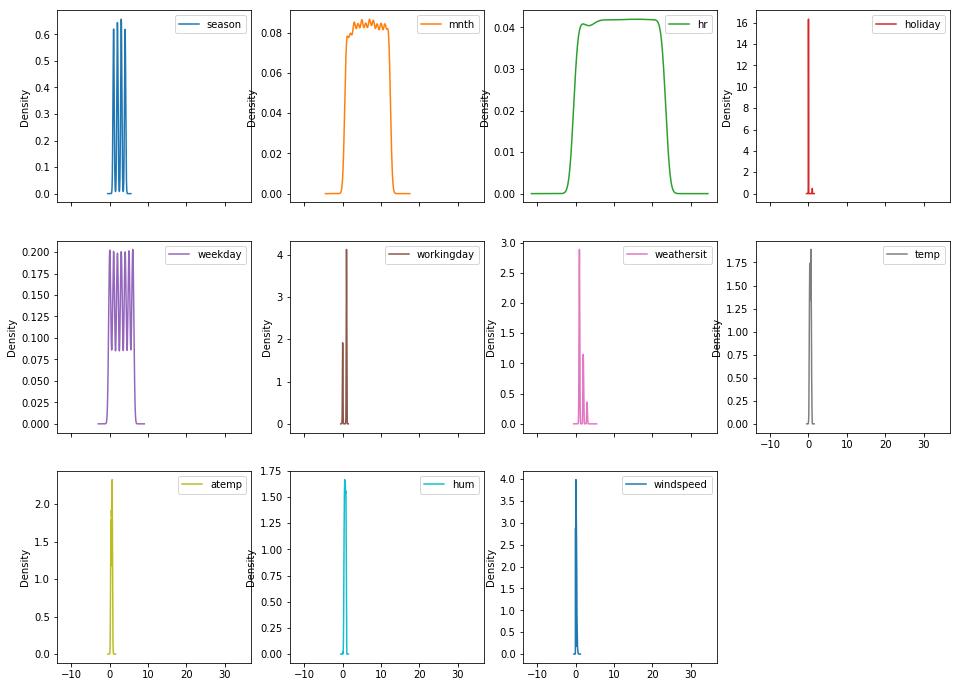

In [179]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

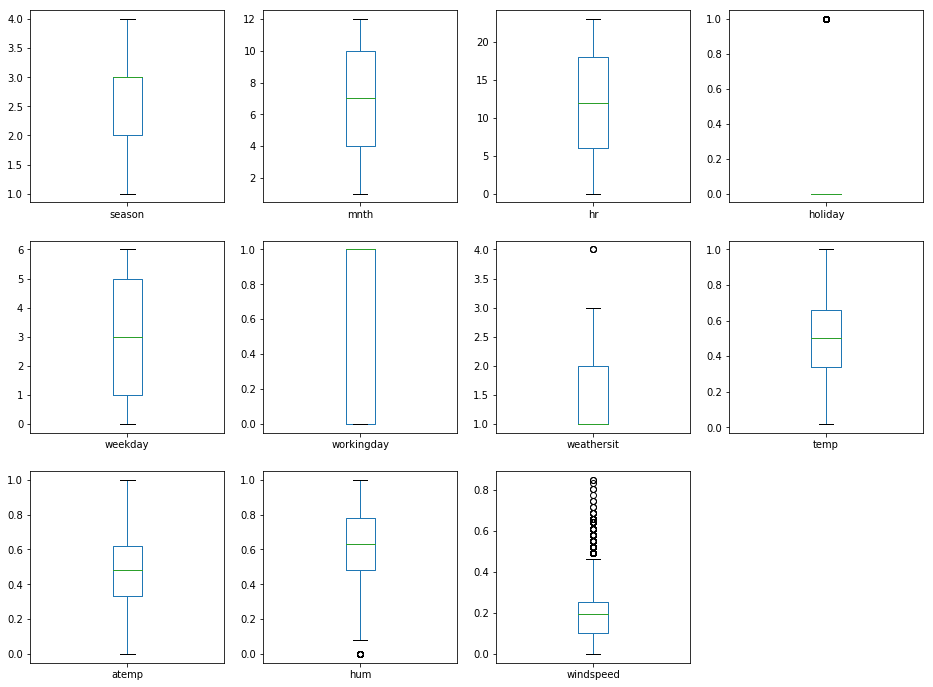

In [180]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

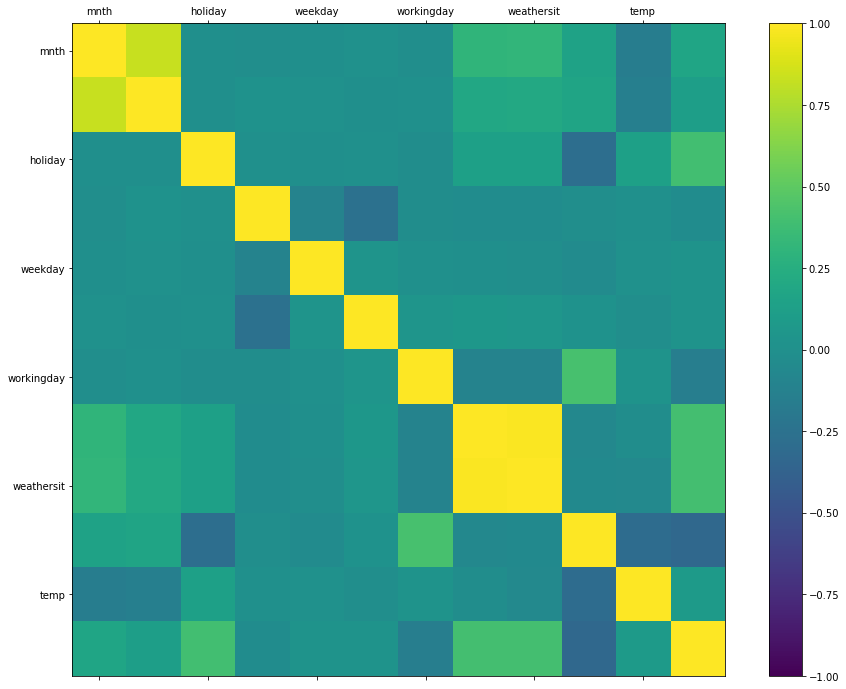

In [181]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
col_labels=['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','targetVar']
ax.set_xticklabels(col_labels)
ax.set_yticklabels(col_labels)
fig.colorbar(cax)
pyplot.show()

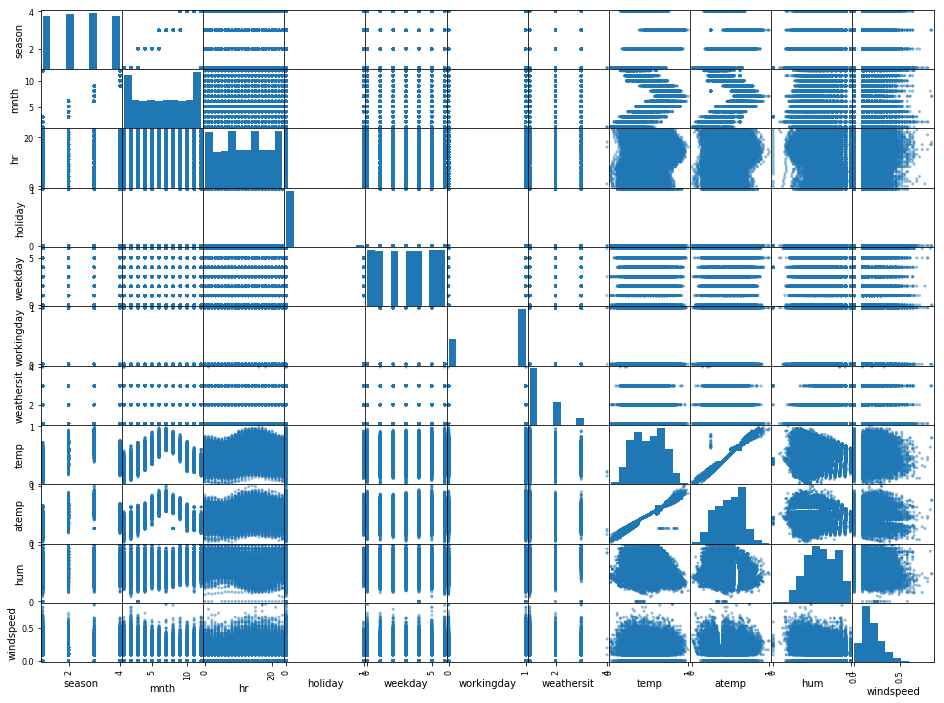

In [182]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [183]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [184]:
# Eliminate additional co-related columns
# Eliminate the column "season" since it is highly co-related with "mnth"
# Eliminate the column "atemp" since it is highly co-related with "temp"
entireDataset.drop('season', axis=1, inplace=True)
entireDataset.drop('atemp', axis=1, inplace=True)
totCol = len(entireDataset.columns)
totAttr = totCol-1

### 3.c) Data Transforms

In [185]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [186]:
seedNum = 888
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

Total time for data handling and visualization: 0:00:36.866712


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate four linear, three non-linear and four ensemble algorithms:

Linear Algorithms: Linear Regression, Ridge Regression, LASSO Regression, and Elastic Net Regression

Non-Linear Algorithms: Decision Trees (CART), k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [187]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [188]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
results = []
names = []

In [189]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LR: -21587.651164 (1336.440246)
Model training time: 0:00:00.046874
RR: -21587.632967 (1335.875429)
Model training time: 0:00:00.037711
LASSO: -21659.037684 (1300.347647)
Model training time: 0:00:00.024677
EN: -25931.234280 (1174.755454)
Model training time: 0:00:00.036788
CART: -8991.208099 (407.555843)
Model training time: 0:00:00.522380
KNN: -6532.490290 (387.624003)
Model training time: 0:00:00.317652
SVM: -15895.009411 (1253.997976)
Model training time: 0:00:57.888815
RF: -5190.583582 (327.483658)
Model training time: 0:00:02.922847
ET: -5149.448936 (278.590171)
Model training time: 0:00:02.482909
AB: -13469.182612 (657.509635)
Model training time: 0:00:04.109597
GBM: -7219.548221 (511.088655)
Model training time: 0:00:04.390325


### 4.b) Spot-checking baseline algorithms

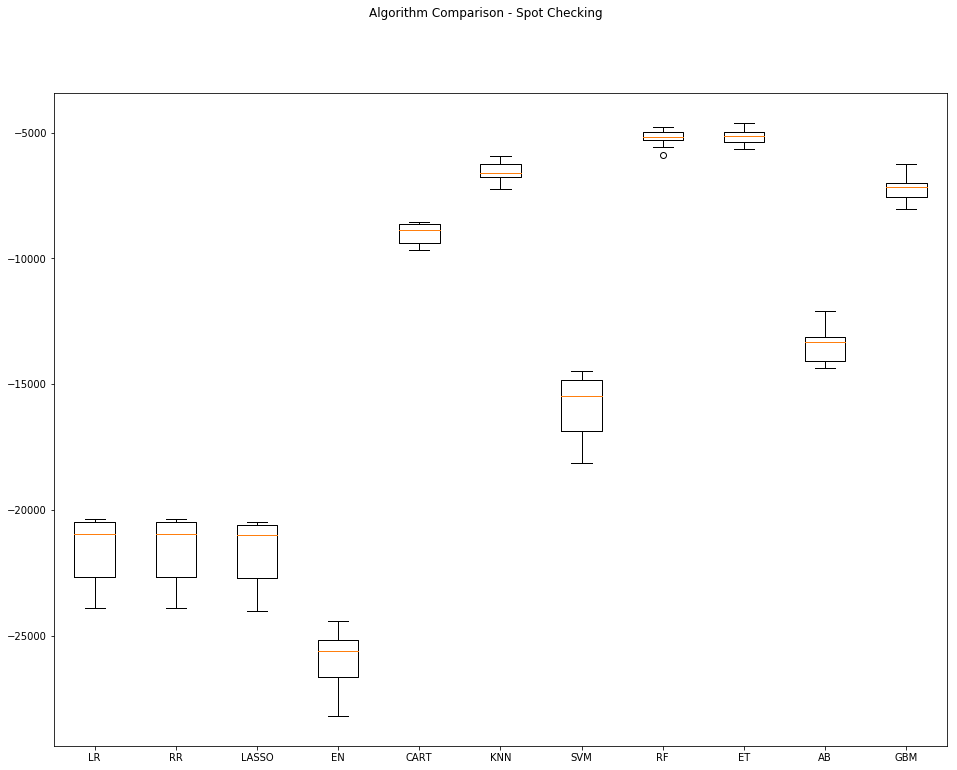

In [190]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [191]:
# Set up the comparison array
results = []
names = []

In [192]:
# Tuning algorithm #1 - Extra Trees
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=numpy.array([50,100,150,200,250]))
model1 = ExtraTreesRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -4688.427212 using {'n_estimators': 200}
-4783.094007 (331.585399) with: {'n_estimators': 50}
-4725.038692 (294.328748) with: {'n_estimators': 100}
-4699.978682 (288.243037) with: {'n_estimators': 150}
-4688.427212 (285.449182) with: {'n_estimators': 200}
-4693.785095 (282.424955) with: {'n_estimators': 250}
Model training time: 0:03:47.360181


In [193]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=numpy.array([200,400,600,800,1000]))
model2 = RandomForestRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -4718.137408 using {'n_estimators': 1000}
-4735.362049 (284.625456) with: {'n_estimators': 200}
-4726.122146 (287.856565) with: {'n_estimators': 400}
-4721.665406 (288.512577) with: {'n_estimators': 600}
-4721.829892 (286.754828) with: {'n_estimators': 800}
-4718.137408 (287.489426) with: {'n_estimators': 1000}
Model training time: 0:17:50.177467


In [194]:
# Tuning algorithm #3 - k-Nearest Neighbors
startTimeModule = datetime.now()
paramGrid3 = dict(n_neighbors=numpy.array([5,10,15]))
model3 = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('KNN')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -6236.197483 using {'n_neighbors': 10}
-6532.483922 (387.657063) with: {'n_neighbors': 5}
-6236.197483 (364.838143) with: {'n_neighbors': 10}
-6486.836616 (367.796412) with: {'n_neighbors': 15}
Model training time: 0:00:06.437005


### 5.b) Compare Algorithms After Tuning

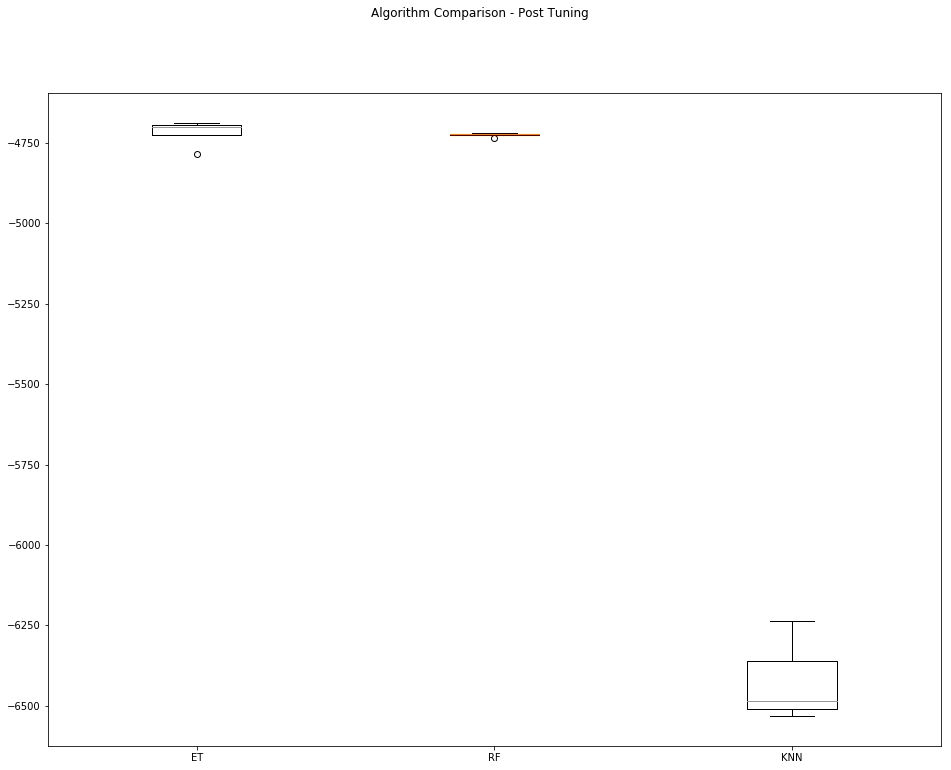

In [195]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [196]:
model = ExtraTreesRegressor(n_estimators=200, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

4751.373340548043


### 6.b) Create standalone model on entire training dataset

In [197]:
startTimeModule = datetime.now()
finalModel = ExtraTreesRegressor(n_estimators=200)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:10.234971


### 6.c) Save model for later use

In [198]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:23:52.482639
